<p style="background-color:#009de1;font-family:tahoma;font-size:30pt;color:white;text-align:center;border-radius:10px; padding-bottom:2.5%; height:70px; line-height:70px;"><b>Credit Score Classification - ANN </b></p>

<font color=#ff0000> **Note:** <font>

<font color=#ff0000> This notebook uses a cleaned and thoroughly explored version of the credit-score-classification train dataset. Therefore, no additional exploratory data analysis (EDA) has been conducted here, only an overview of the data structure has been provided. You can access and review my EDA notebook either from this dataset or via my profile.</font>

<div style="color:#009de1">
    
<span style="font-size:22px;font-family:Tahoma;color:#009de1"> About the Dataset </span>
<hr style="height:0.6px;background-color:#009de1">
</div>

<p style="font-family:tahoma;text-align:justify" >

This dataset provides a comprehensive view of customer profiles, encompassing demographic details, financial histories, and payment patterns that play a crucial role in evaluating credit risk. The goal is to clean and analyze this data to identify key features suitable for training Machine Learning and Deep Learning Algorithms.

- **Dataset:** Credit Score Dataset  
- **Content:** Customer demographic, financial, and credit history data.  
- **Number of Rows:** 100 000
- **Number of Columns:** 28  

| **No** | **INPUTS**                  | **Description**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **id**                       | Unique identifier for each record.                                                               |
| 2     | **customer_id**              | Unique identifier for each customer.                                                             |
| 3     | **month**                    | Month of the transaction or record.                                                              |
| 4     | **name**                     | Customer’s name.                                                                                 |
| 5     | **age**                      | The customer’s age.                                                                              |
| 6     | **ssn**                      | Customer’s social security number.                                                               |
| 7     | **occupation**               | The customer’s occupation.                                                                       |
| 8     | **annual_income**            | The customer’s annual income.                                                                    |
| 9     | **monthly_inhand_salary**    | The customer’s monthly take-home salary.                                                         |
| 10    | **num_bank_accounts**        | Total number of bank accounts owned by the customer.                                            |
| 11    | **num_credit_card**          | Total number of credit cards held by the customer.                                              |
| 12    | **interest_rate**            | The interest rate applied to loans or credits.                                                  |
| 13    | **num_of_loan**              | Number of loans the customer has taken.                                                          |
| 14    | **type_of_loan**             | Categories of loans obtained by the customer.                                                   |
| 15    | **delay_from_due_date**      | The delay in payment relative to the due date.                                                 |
| 16    | **num_of_delayed_payment**   | Total instances of late payments made by the customer.                                          |
| 17    | **changed_credit_limit**     | Adjustments made to the customer’s credit limit.                                               |
| 18    | **num_credit_inquiries**     | Number of inquiries made regarding the customer's credit.                                       |
| 19    | **credit_mix**               | The variety of credit types the customer uses (e.g., loans, credit cards).                     |
| 20    | **outstanding_debt**         | Total amount of debt the customer currently owes.                                              |
| 21    | **credit_utilization_ratio** | Proportion of credit used compared to the total credit limit.                                   |
| 22    | **credit_history_age**       | Duration of the customer’s credit history.                                                      |
| 23    | **payment_of_min_amount**    | Indicates if the customer pays the minimum required amount each month.                         |
| 24    | **total_emi_per_month**      | Total Equated Monthly Installment (EMI) paid by the customer.                                   |
| 25    | **amount_invested_monthly**  | Monthly investment amount made by the customer.                                                 |
| 26    | **payment_behaviour**        | Customer’s payment habits and tendencies.                                                       |
| 27    | **monthly_balance**          | The remaining balance in the customer’s account at the end of each month.                      |
| 28    | **credit_score**             | The customer’s credit score (target variable: "Good," "Poor," "Standard").                     |

- > *This dataset is an excellent foundation for building models aimed at evaluating credit risk, enabling a thorough exploration of the elements influencing credit scores.*  
- > *This notebook uses the dataset, which is the cleaned dataset I performed EDA on. Original dataset is available on Kaggle:* [Credit Score Classification](https://www.kaggle.com/datasets/parisrohan/credit-score-classification/data?select=train.csv)

---
<p>


In [37]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv
/kaggle/input/credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv


In [38]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pickle
import re
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss


# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# To disable warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
tf.config.optimizer.set_jit(False)

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas Settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

# Read the Dataset and Overview

In [39]:
df = pd.read_csv("/kaggle/input/credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv")

In [40]:
df.head()

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,26.823,265,No,80.415,High_spent_Small_value_payments,312.494,2
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",-1,7,11.270,4,Good,809.980,31.945,266,No,118.280,Low_spent_Large_value_payments,284.629,2
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",3,7,11.270,4,Good,809.980,28.609,267,No,81.700,Low_spent_Medium_value_payments,331.210,2
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",5,4,6.270,4,Good,809.980,31.378,268,No,199.458,Low_spent_Small_value_payments,223.451,2
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.120,1824.843,49.575,3,4,3,4,"['Auto Loan', 'Credit-Builder Loan', 'Personal...",6,4,11.270,4,Good,809.980,24.797,269,No,41.420,High_spent_Medium_value_payments,341.489,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.000,33.309,10.765,14.000,24.000,33.000,42.000,56.000
annual_income,100000.000,50505.123,38299.422,7005.930,19342.972,36999.705,71683.470,179987.280
monthly_inhand_salary,100000.000,4198.772,3187.494,303.645,1626.762,3096.378,5961.745,15204.634
total_emi_per_month,100000.000,107.044,130.035,0.000,29.197,66.403,146.827,3776.000
num_bank_accounts,100000.000,5.369,2.593,0.000,3.000,5.000,7.000,11.000
num_credit_card,100000.000,5.534,2.067,0.000,4.000,5.000,7.000,11.000
interest_rate,100000.000,14.532,8.741,1.000,7.000,13.000,20.000,34.000
num_of_loan,100000.000,3.533,2.446,0.000,2.000,3.000,5.000,9.000
delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
num_of_delayed_payment,100000.000,13.334,6.271,0.000,9.000,14.000,18.000,28.000


In [43]:
df.describe(include="object").T

,count,unique,top,freq
id,100000,100000,0x25fb6,1
customer_id,100000,12500,CUS_0x942c,8
month,100000,8,January,12500
name,100000,10139,Stevex,48
ssn,100000,12500,078-73-5990,8
occupation,100000,15,Lawyer,7096
type_of_loan,100000,6261,['No Loan'],11408
credit_mix,100000,3,Standard,45848
payment_of_min_amount,100000,2,Yes,59432
payment_behaviour,100000,6,Low_spent_Small_value_payments,27588


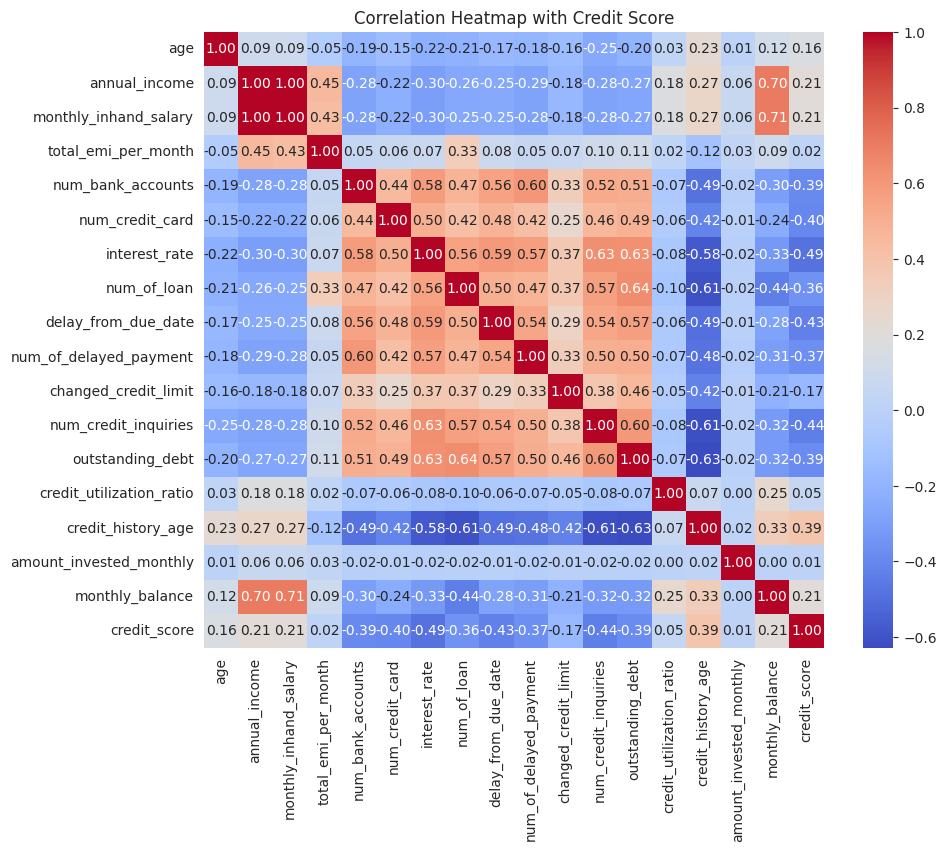

In [44]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [45]:
# Numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

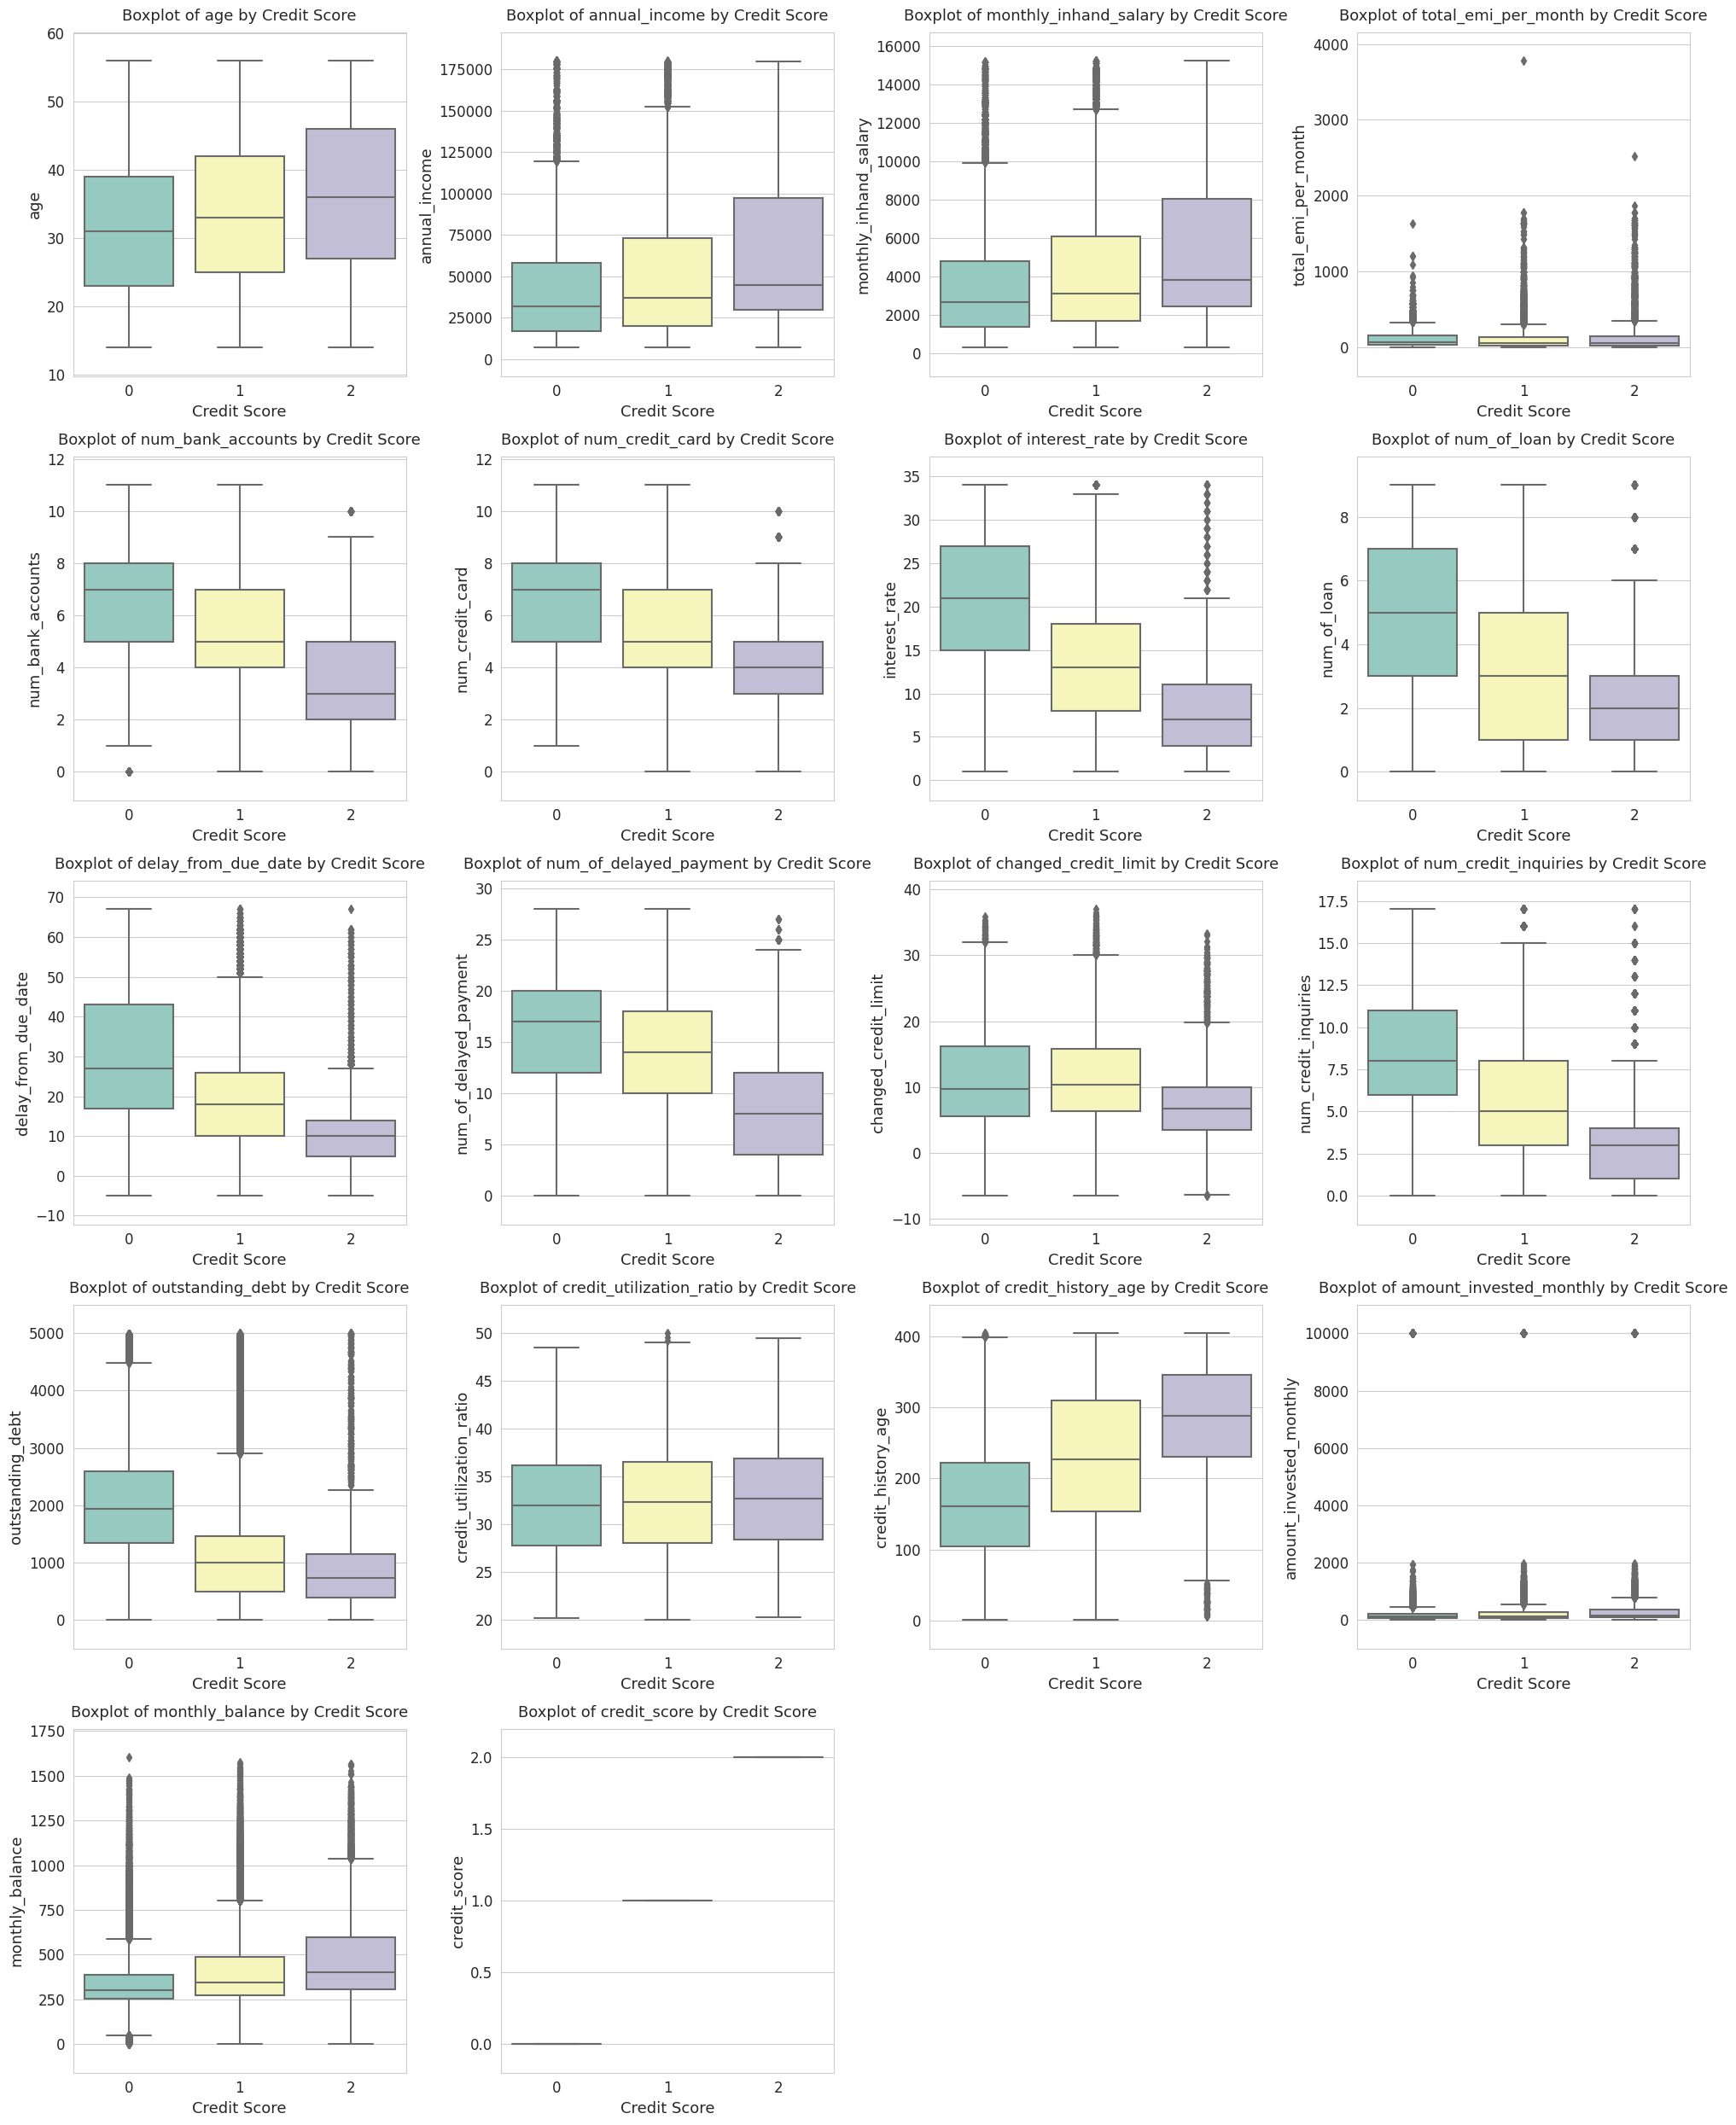

In [46]:

# Calculate number of rows and columns
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='credit_score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Automatically adjust y-axis limits
    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

# Adjust horizontal (wspace) and vertical (hspace) spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

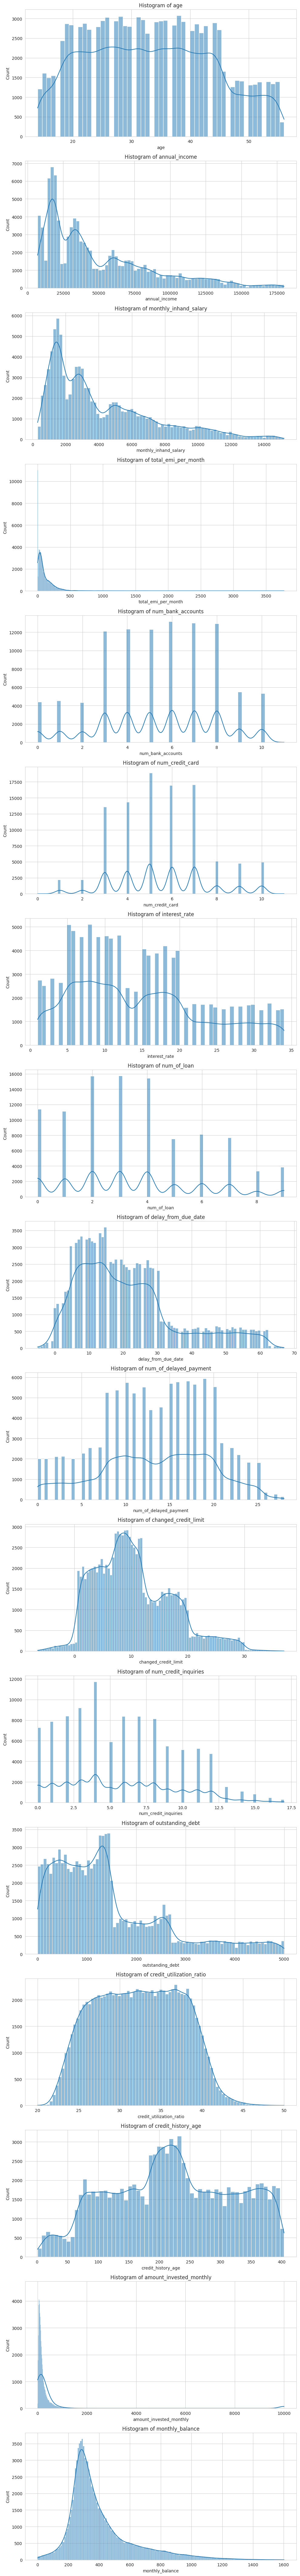

In [47]:
# Get all numerical features
features = numeric_columns[:-1]

# Define the layout for the plots
n_cols = 1  # Specify the number of columns here
n_rows = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
plt.subplots_adjust(hspace=0.5)

# Plotting
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])  # hue parametresi kaldırıldı
    axes[i].set_title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()


In [48]:
# Function to detect outliers
def detect_outliers_iqr(df):
    outliers = {}

    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    for column in numeric_df.columns:
        # Calculate the first (Q1) and third quartiles (Q3)
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Determine the lower and upper bounds
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify outliers
        outlier_mask = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
        outliers[column] = numeric_df[column][outlier_mask]

    return outliers

# Detect outliers
outlier_results = detect_outliers_iqr(df)

# Print the results
for column, outlier_values in outlier_results.items():
    if not outlier_values.empty:
        print(f"{column} outliers:")
        print(outlier_values)
    else:
        print(f"For {column} no outliers.")


For age no outliers.
For annual_income no outliers.
For monthly_inhand_salary no outliers.
total_emi_per_month outliers:
50      911.220
51      911.220
52      911.220
53      911.220
54      911.220
          ...  
99627   999.719
99628   999.719
99629   999.719
99630   999.719
99631   999.719
Name: total_emi_per_month, Length: 1338, dtype: float64
For num_bank_accounts no outliers.
For num_credit_card no outliers.
For interest_rate no outliers.
For num_of_loan no outliers.
For delay_from_due_date no outliers.
For num_of_delayed_payment no outliers.
For changed_credit_limit no outliers.
For num_credit_inquiries no outliers.
For outstanding_debt no outliers.
For credit_utilization_ratio no outliers.
For credit_history_age no outliers.
amount_invested_monthly outliers:
18      10000.000
23      10000.000
28      10000.000
54        930.392
55        870.522
           ...   
99919   10000.000
99927    1104.416
99951   10000.000
99973   10000.000
99974   10000.000
Name: amount_invested_

In [49]:
df["credit_score"].value_counts(normalize = True) # 2:Good, 1: Standard, 0: Poor

credit_score
1   0.532
0   0.290
2   0.178
Name: proportion, dtype: float64

# Data Preprocessing


In [50]:
# List of unique loan values
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# Adding a new column for each unique loan type and checking how many times it appears
for loan_type in unique_loan_types:
    # Replacing '-' and spaces with underscores, converting other characters to lowercase
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    # Counting how many times the loan_type value appears in each row
    df[cleaned_loan_type] = df['type_of_loan'].apply(lambda x: x.count(loan_type))


In [51]:
df = df.drop([
    "id", "customer_id", "name", "ssn", "type_of_loan"], axis=1)

df.head()

,month,age,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.120,1824.843,49.575,3,4,3,4,3,7,11.270,4,Good,809.980,26.823,265,No,80.415,High_spent_Small_value_payments,312.494,2,1,1,0,1,0,0,0,0,1,0
1,February,23,Scientist,19114.120,1824.843,49.575,3,4,3,4,-1,7,11.270,4,Good,809.980,31.945,266,No,118.280,Low_spent_Large_value_payments,284.629,2,1,1,0,1,0,0,0,0,1,0
2,March,23,Scientist,19114.120,1824.843,49.575,3,4,3,4,3,7,11.270,4,Good,809.980,28.609,267,No,81.700,Low_spent_Medium_value_payments,331.210,2,1,1,0,1,0,0,0,0,1,0
3,April,23,Scientist,19114.120,1824.843,49.575,3,4,3,4,5,4,6.270,4,Good,809.980,31.378,268,No,199.458,Low_spent_Small_value_payments,223.451,2,1,1,0,1,0,0,0,0,1,0
4,May,23,Scientist,19114.120,1824.843,49.575,3,4,3,4,6,4,11.270,4,Good,809.980,24.797,269,No,41.420,High_spent_Medium_value_payments,341.489,2,1,1,0,1,0,0,0,0,1,0


In [52]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,#Successfully managing large debts provides the most positive contribution to the credit score.
    'High_spent_Medium_value_payments': 5, #Medium-value payments with high spending positively impact the credit score.
    'High_spent_Small_value_payments': 4, #Small payments can negatively affect the credit score if debts accumulate over time.
    'Low_spent_Large_value_payments': 3, #shows quick financial responsibility, positively affecting the credit score.
    'Low_spent_Medium_value_payments': 2, #contributes positively to the credit score by demonstrating debt management.
    'Low_spent_Small_value_payments': 1 #may limit the credit history and provide minimal contribution to the credit score
}


df['payment_behaviour'] = df['payment_behaviour'].map(payment_mapping)

df['payment_behaviour'] = pd.to_numeric(df['payment_behaviour'], downcast='integer')


In [53]:
# Convert the credit_mix column to numerical values
df['credit_mix'] = df['credit_mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['credit_mix'] = pd.to_numeric(df['credit_mix'], downcast='integer')

In [54]:
# Convert the payment_of_min_amount column to numerical values
df['payment_of_min_amount'] = df['payment_of_min_amount'].map({'Yes': 1, 'No': 0})

df['payment_of_min_amount'] = pd.to_numeric(df['payment_of_min_amount'], downcast='integer')



In [55]:
df = pd.get_dummies(df, columns=['occupation'])

In [56]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['month'] = df['month'].map(month_map)

df['month'] = pd.to_numeric(df['month'], downcast='integer')

In [57]:
# Separate features and target variable
X = df.drop("credit_score", axis=1)
y = df.credit_score

In [58]:
y.value_counts(normalize=True) # unbalanced data  2:Good, 1: Standard, 0: Poor

credit_score
1   0.532
0   0.290
2   0.178
Name: proportion, dtype: float64

In [59]:
# smote for unbalanced data
smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [60]:
y.value_counts() # 2:Good, 1: Standard, 0: Poor

credit_score
2    53174
1    53174
0    53174
Name: count, dtype: int64

In [61]:
df.head()

,month,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,occupation_Accountant,occupation_Architect,occupation_Developer,occupation_Doctor,occupation_Engineer,occupation_Entrepreneur,occupation_Journalist,occupation_Lawyer,occupation_Manager,occupation_Mechanic,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer
0,1,23,19114.120,1824.843,49.575,3,4,3,4,3,7,11.270,4,2,809.980,26.823,265,0,80.415,4,312.494,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,2,23,19114.120,1824.843,49.575,3,4,3,4,-1,7,11.270,4,2,809.980,31.945,266,0,118.280,3,284.629,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3,23,19114.120,1824.843,49.575,3,4,3,4,3,7,11.270,4,2,809.980,28.609,267,0,81.700,2,331.210,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,4,23,19114.120,1824.843,49.575,3,4,3,4,5,4,6.270,4,2,809.980,31.378,268,0,199.458,1,223.451,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,5,23,19114.120,1824.843,49.575,3,4,3,4,6,4,11.270,4,2,809.980,24.797,269,0,41.420,5,341.489,2,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## Train-Test Splits

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    stratify=y, random_state=42)

In [63]:
df["credit_score"].value_counts()

credit_score
1    53174
0    28998
2    17828
Name: count, dtype: int64

In [64]:
y_train.value_counts()

credit_score
0    47857
2    47856
1    47856
Name: count, dtype: int64

In [65]:
# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Apply to training data
X_train_scaled= scaler.fit_transform(X_train)

# Apply to test data
X_test_scaled = scaler.transform(X_test)


In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# ANN Model

In [67]:
tf.random.set_seed(42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=70,
                               restore_best_weights=True)

model.fit(x=X_train_scaled,
          y=y_train,
          validation_data=(X_test_scaled, y_test),
          batch_size=512,
          epochs=750,
          verbose=1,
          callbacks=[early_stopping])

Epoch 1/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6141 - loss: 0.9412 - val_accuracy: 0.7409 - val_loss: 0.6443
Epoch 2/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7222 - loss: 0.6775 - val_accuracy: 0.7482 - val_loss: 0.5982
Epoch 3/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7412 - loss: 0.6266 - val_accuracy: 0.7592 - val_loss: 0.5739
Epoch 4/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7493 - loss: 0.6020 - val_accuracy: 0.7657 - val_loss: 0.5580
Epoch 5/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7561 - loss: 0.5843 - val_accuracy: 0.7737 - val_loss: 0.5423
Epoch 6/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7608 - loss: 0.5698 - val_accuracy: 0.7805 - val_loss: 0.5255
Epoch 7/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 0.5559 - val_accuracy: 0.7844 - val_loss: 0.5133
Epoch 8/750
281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7710 - loss: 0.5458 - val_ac

Since the best result is seen at epoch 412 above, I will train the final model for 318 epochs without using early stopping.

<Axes: >

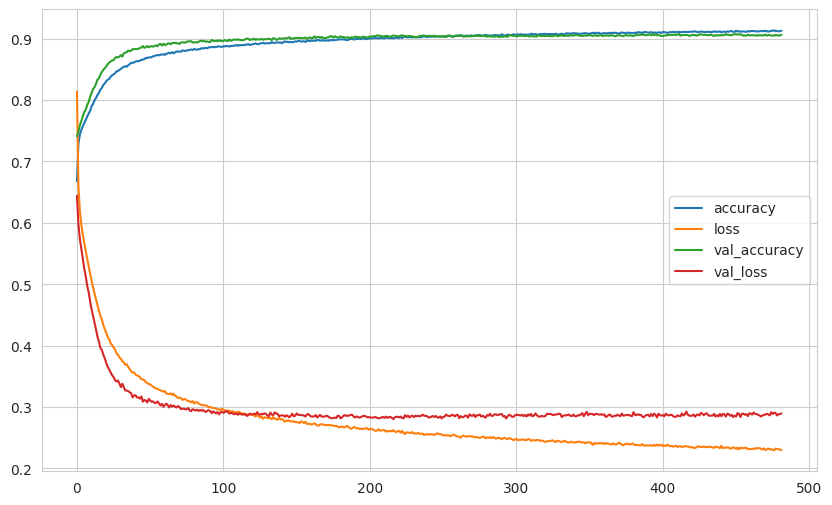

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [69]:
model.evaluate(X_train_scaled, y_train)

4487/4487 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9484 - loss: 0.1366


[0.1332269310951233, 0.9501911997795105]

In [70]:
eval_metric(model, X_train_scaled, y_train, X_test_scaled, y_test)

4487/4487 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
499/499 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Set:
[[5088  183   46]
 [ 643 4248  427]
 [  24  148 5146]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5317
           1       0.93      0.80      0.86      5318
           2       0.92      0.97      0.94      5318

    accuracy                           0.91     15953
   macro avg       0.91      0.91      0.91     15953
weighted avg       0.91      0.91      0.91     15953


Train Set:
[[47576   272     9]
 [ 4147 41217  2492]
 [    6   225 47625]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     47857
           1       0.99      0.86      0.92     47856
           2       0.95      1.00      0.97     47856

    accuracy                           0.95    143569
   macro avg       0.95      0.95      0.95    143569
weighted avg       0.95      0.95      0.95    143569



In [71]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,036,171 (3.95 MB)

 Trainable params: 344,451 (1.31 MB)

 Non-trainable params: 2,816 (11.00 KB)

 Optimizer params: 688,904 (2.63 MB)

# Final Model

In [72]:
print(X.shape)
print(y.shape)

(159522, 46)
(159522,)


In [73]:
# Columns to apply RobustScaler
robust_columns = ['total_emi_per_month', 'amount_invested_monthly', 'monthly_balance']
# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Create the ColumnTransformer
scaler= ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

scaler = scaler.fit(X)



In [74]:
pickle.dump(scaler, open("credit_score_scaler", 'wb'))

In [75]:
X_scaled = scaler.transform(X)

In [76]:
tf.random.set_seed(42)

final_model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
final_model.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

final_model.fit(x=X_scaled,
          y=y,
          batch_size=512,
          epochs=412,
          verbose=1)

Epoch 1/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.6336 - loss: 0.9048
Epoch 2/412
 31/312 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7326 - loss: 0.6622

I0000 00:00:1729248276.676796     118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 4 bytes spill stores, 4 bytes spill loads



312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7323 - loss: 0.6564
Epoch 3/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7463 - loss: 0.6147
Epoch 4/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7544 - loss: 0.5918
Epoch 5/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7579 - loss: 0.5746
Epoch 6/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 0.5601
Epoch 7/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7705 - loss: 0.5456
Epoch 8/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7794 - loss: 0.5304
Epoch 9/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7831 - loss: 0.5193
Epoch 10/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7897 - loss: 0.5056
Epoch 11/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4945
Epoch 12/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4839
Epoch 13/412
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [77]:
# Save Model

save_model(final_model, 'final_model_credit_score.keras')

# Final Model Prediction

In [78]:
scaler = pickle.load(open("credit_score_scaler", "rb"))

In [79]:
final_model = load_model('final_model_credit_score.keras')

<font color=#ff0000> **Note:** <font>

<font color=#ff0000>
  "Since We don’t know the true values of the target column in the credit_score_test data, the prediction step would be a mere formality. For this reason, instead of performing EDA on the credit_score_test data,
  I’m generating synthetic data based on the statistics of my own cleaned dataset." </font>

In [80]:
# Generating random data suitable for statistics using your sample dataset
def generate_synthetic_data(df, num_samples=50):
    synthetic_data = pd.DataFrame()

    for column in df.columns:
        if column != 'credit_score':  # Excluding the target column (e.g., for classification)
            # Extract statistics from your current dataset
            min_val = df[column].min()
            max_val = df[column].max()
            mean_val = df[column].mean()
            std_val = df[column].std()

            # Generate random data suitable for statistics
            synthetic_data[column] = np.random.normal(loc=mean_val, scale=std_val, size=num_samples)

            # Adjust the minimum and maximum values of the generated data to match the original dataset
            synthetic_data[column] = synthetic_data[column].clip(lower=min_val, upper=max_val)

    return synthetic_data

# Generating 50 rows of synthetic data based on the statistics of your current dataset
df_prediction = generate_synthetic_data(df, num_samples=50)


In [81]:
df_prediction_scaled = scaler.transform(df_prediction)

In [82]:
final_model.predict(df_prediction_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


array([[2.0531777e-02, 3.2634663e-03, 9.7620481e-01],
       [2.5410566e-01, 7.4524641e-01, 6.4790779e-04],
       [1.2993343e-04, 8.6896074e-01, 1.3090934e-01],
       [9.9614811e-01, 3.5012027e-07, 3.8514961e-03],
       [9.9993825e-01, 2.0322909e-10, 6.1739556e-05],
       [9.8717237e-01, 8.7187625e-05, 1.2740430e-02],
       [9.9838388e-01, 2.4497112e-06, 1.6136195e-03],
       [2.1937178e-01, 7.6702881e-01, 1.3599425e-02],
       [2.1203836e-02, 3.8161691e-02, 9.4063443e-01],
       [2.5779387e-04, 1.9863052e-03, 9.9775594e-01],
       [9.9806064e-01, 1.2904262e-12, 1.9392974e-03],
       [9.9709958e-01, 4.4577098e-07, 2.8999227e-03],
       [9.1384715e-01, 6.3603677e-02, 2.2549206e-02],
       [2.2160221e-02, 9.7772801e-01, 1.1176412e-04],
       [5.4822862e-03, 5.7618308e-04, 9.9394149e-01],
       [9.9568057e-04, 9.9893576e-01, 6.8567308e-05],
       [9.9879158e-01, 2.4478383e-10, 1.2084076e-03],
       [2.8159150e-01, 7.1595401e-01, 2.4545593e-03],
       [9.5971638e-01, 2.926

In [83]:
y_pred_probabilities = final_model.predict(df_prediction_scaled)

y_pred = y_pred_probabilities.argmax(axis=1) #prediction values



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [84]:
normalized_predictions = tf.nn.softmax(y_pred_probabilities, axis=-1).numpy()#normalized probabilites of each class

In [85]:
pred_df = pd.DataFrame({'pred': y_pred})

# Mapping dictionary for the reverse transformation
mapping = {2: 'Good', 1: 'Standard', 0: 'Poor'}

# Apply the mapping
pred_df["pred"] = pred_df["pred"] .map(mapping)



In [86]:
pred_df["pred_proba_poor"] = normalized_predictions[:,0]
pred_df["pred_proba_standard"] = normalized_predictions[:,1]
pred_df["pred_proba_good"] = normalized_predictions[:,2]
pred_df

,pred,pred_proba_poor,pred_proba_standard,pred_proba_good
0,Good,0.218,0.214,0.567
1,Standard,0.293,0.479,0.228
2,Standard,0.221,0.527,0.252
3,Poor,0.575,0.212,0.213
4,Poor,0.576,0.212,0.212
5,Poor,0.571,0.213,0.216
6,Poor,0.576,0.212,0.212
7,Standard,0.282,0.488,0.230
8,Good,0.221,0.225,0.554
9,Good,0.212,0.213,0.575


In [87]:
#If you've reviewed everything up to this point, I guess I did a good job. Your feedback is valuable.
#Also, the upvote button is in the top right corner :)